#Sentiment prediction model using NLP on messages from reviews.

**Bibliography:**


*   10 Tasks With NLP: Twitter Sentiment Analysis, https://medium.com/swlh/10-tasks-with-nlp-twitter-sentiment-analysis-fb1a2757d91f


*   How To Build and Deploy an NLP Model with FastAPI: Part 1, https://towardsdatascience.com/how-to-build-and-deploy-an-nlp-model-with-fastapi-part-1-9c1c7030d40


*   A Step-by-Step NLP Machine Learning Classifier Tutorial, https://builtin.com/machine-learning/nlp-machine-learning


*   5 Techniques to work with Imbalanced Data in Machine Learning, https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c


*   Under-sampling methods, https://imbalanced-learn.org/stable/references/under_sampling.html


*   Portuguese Tweets - nltk and sklearn, https://www.kaggle.com/code/leonardoassis/portuguese-tweets-nltk-and-sklearn

*   Generating Word Cloud in Python, https://www.geeksforgeeks.org/generating-word-cloud-python/

*   Translators, https://github.com/UlionTse/translators

*   Language Translation Using Python, https://towardsdatascience.com/language-translation-using-python-bd8020772ccc

*   How to Deploy Machine Learning Models with Python & Streamlit?, https://365datascience.com/tutorials/machine-learning-tutorials/how-to-deploy-machine-learning-models-with-python-and-streamlit/

+   Deploying ML Models using Streamlit, https://towardsdatascience.com/deploying-ml-models-using-streamlit-5d6212453bdd

*   How To Build and Deploy an NLP Model with FastAPI: Part 2, https://towardsdatascience.com/how-to-build-and-deploy-an-nlp-model-with-fastapi-part-2-e63a3eac71ad



#Import of necessary libraries:

Plotting, dataframe manipulation:

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

Machine Learning dependencies:

In [3]:
# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 
from sklearn.metrics import (accuracy_score,  classification_report,  plot_confusion_matrix,)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
# text preprocessing modules
from string import punctuation

# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
    "stopwords",
    "omw-1.4",
):
    nltk.download(dependency)
    
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

#imblearn for undersampling
from imblearn.under_sampling import RandomUnderSampler

#Word Cloud
from wordcloud import WordCloud, STOPWORDS

from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Translation modules:

In [4]:
pip install --upgrade translators &> /dev/null # "&> /dev/null" is used so that the installation process does not display output text, as it is extensive.

In [4]:
import translators as ts
import translators.server as tss

Using state Nevada server backend.


#Functions

For Word cloud generation:

In [83]:
def WordCloudPlott(dataset_words, title):
# Python program to generate WordCloud translated
  comment_words = ''
  stopwords = set(STOPWORDS)


  # iterate through the csv file
  for val in dataset_words.values:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      comment_words += " ".join(tokens)+" "


  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='black',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.title(title)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

Cleaning of text:

In [5]:
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True, lang='portuguese'):
    stop_words =  stopwords.words(lang)
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    # create a count vectorizer object
    
    # Return a list of words
    return(text)

Extraction of common words:

In [6]:
def _get_freq_dist_list(dataset_words):
    ls = []
    # Python program to generate WordCloud translated
    comment_words = ''
    stopwords = set(STOPWORDS)


    # iterate through the csv file
    for val in dataset_words.values:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        for tk_line in tokens:
          #for word in tk_line:
          ls.append(tk_line)

    return ls

Histogram plot of common words:

In [208]:
def Plot_Common_words(dataset_words, title, lang='portuguese'):
    # Frequency Distribution on training dataset
    fd_list = _get_freq_dist_list(dataset_words)
    fdist = FreqDist(fd_list)
    #print(fdist)

    # most common words
    most_common = fdist.most_common(25)
    #print(most_common)

    # most uncommon words (words that appear once)
    most_uncommon = fdist.hapaxes()
    #print(most_uncommon[0:30])

    # find the word occuring max number of times
    #print(fdist.max())
    data={'Word' : [k for k, v in most_common],
          'Count' : [v for k, v in most_common]}
    series=pd.DataFrame(data)
    if lang=='english':
      series.Word.iloc[:30]= series.Word.iloc[:30].apply(lambda x: tss.reverso(x, from_language='pt', to_language='en', if_ignore_empty_query=True, if_ignore_limit_of_length=True, limit_of_length=5000))

    #Plot:
    plt.figure(figsize = (20,8), facecolor='black')
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
    plot = sns.barplot(x  = series.iloc[:30].Word, y = series.iloc[:30].Count, palette= "jet_r")#, backcolor='black')

    for item in plot.get_xticklabels():
        item.set_rotation(20)
        item.set_size(14)
        item.set_color('white')
   
    for item in plot.get_yticklabels():
        item.set_color('white')
        item.set_size(14)

    plt.title(title+'\n', fontsize= 22, color='white')
    #plt.grid(False)



    plt.show()

#Uploading Datasets

In [6]:
Order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_reviews_dataset.csv')

#Preparing data

In [ ]:
Order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
Order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
Products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


First, I want to check how much data is available for this study case.

In [ ]:
Order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print("There are",Order_reviews_df.shape[0] - 58247,"reviews with messages",np.round((Order_reviews_df.shape[0] - 58247)*100/Order_reviews_df.shape[0], 0),"% data available from the total content in the dataset.")

There are 40977 reviews with messages 41.0 % data available from the total content in the dataset.


From the cell above we see that we have 41% of available data,that is 40977 messages reviewing products.

It's a good amount for analysis. 

Now, I'll choose the features for analysis. I'll consider creation date to visualize how the comments have changed over time.

In [7]:
categories = ['review_score', 'review_comment_message'] #, 'review_creation_date','order_id']
Message_review = Order_reviews_df.loc[:,categories]

In [ ]:
#Message_review['Producto'] = np.where(Order_items_df.order_id.reset_index(drop=True) == Message_review.order_id.reset_index(drop=True), Order_items_df.product_id)

I'll drop nulls

In [8]:
Message_review.dropna(inplace=True)
Message_review.reset_index(inplace=True, drop=True)

We verify that the changes have been applied

In [ ]:
Message_review.isnull().sum()

review_score              0
review_comment_message    0
dtype: int64

In [ ]:
Message_review.head(5)

,review_score,review_comment_message
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."


Now, to encode the target feature: 3 or superior will be considered as a positive review, below 3 a negative review.

In [9]:
Message_review['target'] = np.where(Message_review.loc[:,('review_score')] >=3, 1, 0)
Message_review.head(5)

,review_score,review_comment_message,target
0,5,Recebi bem antes do prazo estipulado.,1
1,5,Parabéns lojas lannister adorei comprar pela I...,1
2,4,aparelho eficiente. no site a marca do aparelh...,1
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
4,5,"Vendedor confiável, produto ok e entrega antes...",1


We verify that target contains only 0 or 1:

In [ ]:
Message_review.target.unique()

array([1, 0])

Now, verify that target was assigned correctly specially in score equal 3.

In [ ]:
Message_review[Message_review.review_score == 3]

,review_score,review_comment_message,target
31,3,Eu comprei duas unidades e só recebi uma e ago...,1
32,3,"Produto bom, porém o que veio para mim não con...",1
36,3,Entrega no prazo,1
43,3,"Produto chegou, mas meu PC não conseguiu recon...",1
52,3,A entrega foi dividida em duas. Não houve comu...,1
...,...,...,...
40935,3,otimo,1
40946,3,Muito bom,1
40955,3,Cortina que dá um toque de requinte para qualq...,1
40968,3,Bom dia \r\nDas 6 unidades compradas só recebi...,1


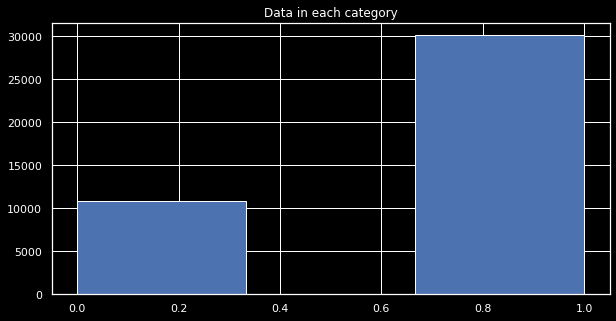

In [135]:
Message_review.loc[:,'target'].hist(bins=3, figsize=(10,5), grid=False)
plt.yticks(c='white')
plt.xticks(c='white')
plt.grid(c='white')
plt.title('Data in each category', c='white')
plt.show()

In [ ]:
Message_review.target.value_counts()

1    30087
0    10890
Name: target, dtype: int64

In [ ]:
print("The relationship between the two classes is", round(10890*100/Message_review.shape[0],0),"% for class 0 and", round(30087*100/Message_review.shape[0],0),"%for class 1")

The relationship between the two classes is 27.0 % for class 0 and 73.0 %for class 1


We can see the data is unbalanced. I'll do undersampling on data from class 1, as I will have 21780 messages remaining, a good amount for analysis.

RandomUnderSampler from imblearn will be used for this task to choose data randomly. This will be done after cleaning the data.


Now, I'll also translate some messages to English to check differences in the model performance.

In [171]:
Message_review['Message_English'] = Message_review.loc[0:4000,'review_comment_message'].apply(lambda x: tss.reverso(x, from_language='pt', to_language='en', if_ignore_empty_query=True, if_ignore_limit_of_length=True, limit_of_length=5000))

#Data cleaning

First I'll test that cleaning and preparing of the text is done correctly in the dataset

In [10]:
#clean the review
Message_review["cleaned_review_portuguese"] = Message_review.review_comment_message.apply(text_cleaning)
#Message_review["cleaned_review_english"] = Message_review.loc[0:4000,'Message_English'].apply(lambda x:text_cleaning(x,lang='english'))

KeyError: ignored

In [173]:
display(Message_review)

,review_score,review_comment_message,cleaned_review,Message_English,cleaned_review_portuguese,cleaned_review_english,target
0,5,Recebi bem antes do prazo estipulado.,Recebi bem ante prazo estipulado,I received well before the deadline.,Recebi bem ante prazo estipulado,I received well deadline,1
1,5,Parabéns lojas lannister adorei comprar pela I...,Parab n lojas lannister adorei comprar Interne...,Congratulations shops Lannister loved buying o...,Parab n lojas lannister adorei comprar Interne...,Congratulations shop Lannister loved buying In...,1
2,4,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente site marca aparelho impress...,efficient apparatus. on the site the brand of ...,aparelho eficiente site marca aparelho impress...,efficient apparatus site brand device printed ...,1
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",Mas pouco travando valor ta Boa,"But a little ,locking...by the value ta Good.",Mas pouco travando valor ta Boa,But little locking value ta Good,1
4,5,"Vendedor confiável, produto ok e entrega antes...",Vendedor confi vel produto ok entrega ante prazo,"Reliable seller, ok product and delivery ahead...",Vendedor confi vel produto ok entrega ante prazo,Reliable seller ok product delivery ahead time,1
...,...,...,...,...,...,...,...
40972,4,para este produto recebi de acordo com a compr...,produto recebi acordo compra realizada,NaN,produto recebi acordo compra realizada,NaN,1
40973,5,Entregou dentro do prazo. O produto chegou em ...,Entregou dentro prazo O produto chegou condi e...,NaN,Entregou dentro prazo O produto chegou condi e...,NaN,1
40974,3,"O produto não foi enviado com NF, não existe v...",O produto n enviado NF n existe venda NF certe...,NaN,O produto n enviado NF n existe venda NF certe...,NaN,1
40975,5,"Excelente mochila, entrega super rápida. Super...",Excelente mochila entrega super r pida Super r...,NaN,Excelente mochila entrega super r pida Super r...,NaN,1


#Word cloud

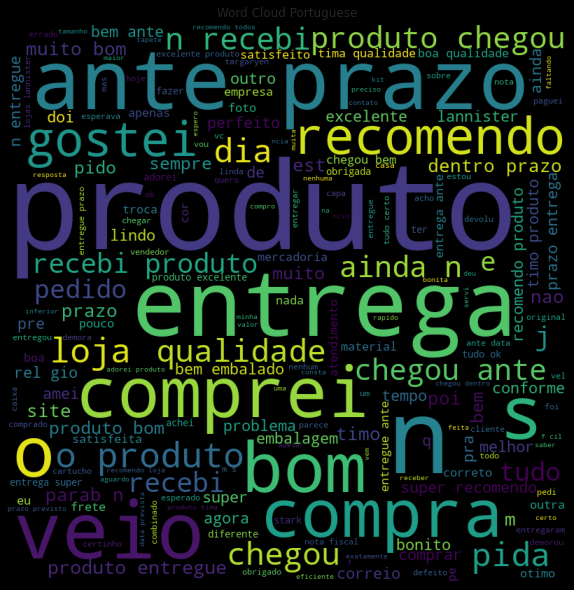

In [174]:
WordCloudPlott(Message_review.loc[0:2000,'cleaned_review_portuguese'], title='Word Cloud Portuguese')

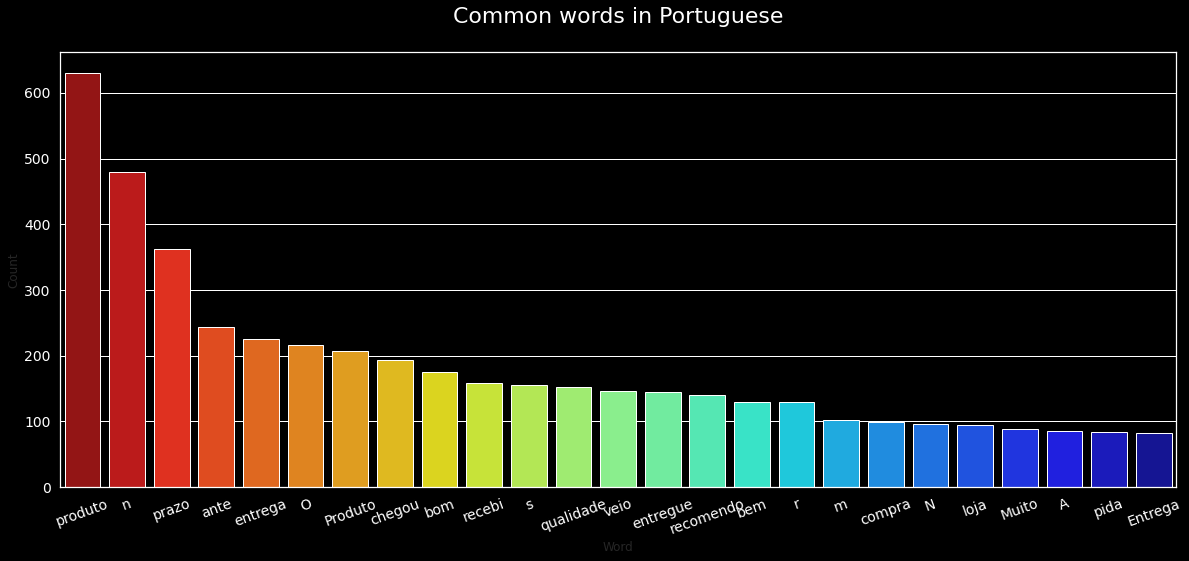

In [175]:
Plot_Common_words(Message_review.loc[0:2000,'cleaned_review_portuguese'],  title='Common words in Portuguese')

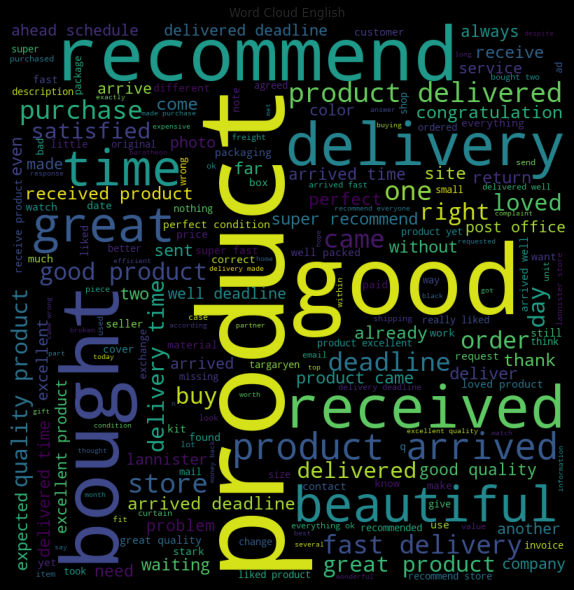

In [201]:
WordCloudPlott(Message_review.loc[0:4000,'cleaned_review_english'], title='Word Cloud English')

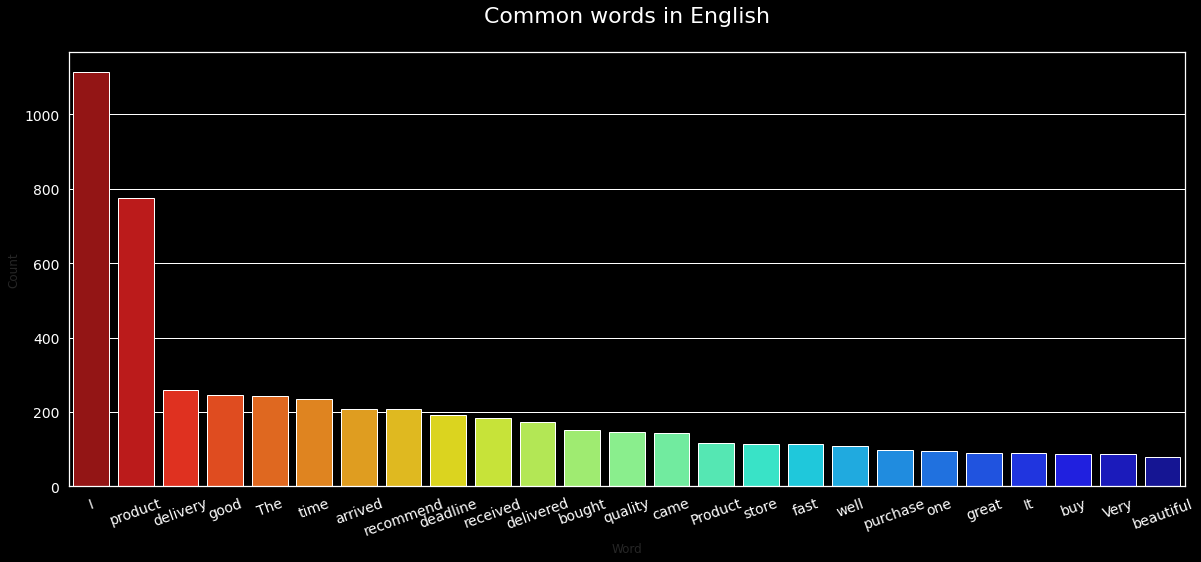

In [177]:
Plot_Common_words(Message_review.loc[0:2000,'cleaned_review_english'],  title='Common words in English')

#Implementation of model

Create a count vectorizer object

In [15]:
vectorizer = CountVectorizer()
X_pt = Message_review['cleaned_review_portuguese']
#X_en = Message_review.loc[:4000,'cleaned_review_english']

Setting target for model

In [16]:
y_pt=Message_review.target
#y_en=Message_review.loc[:4000,'target']

Let's check shapes of every array created

In [17]:
print('For portuguese:  X=',X_pt.shape,'y=',y_pt.shape)
#print('For english:     X=',X_en.shape,'y=',y_en.shape)

For portuguese:  X= (40977,) y= (40977,)


Now, we need to balance the classes. This will be done doing undersampling in data from both languages

In [18]:
undersample = RandomUnderSampler()
X_pt, y_pt  = undersample.fit_resample(X_pt, y_pt)
X_en, y_en  = undersample.fit_resample(X_en, y_en)

ValueError: ignored

Let's check shapes of every array again:

In [228]:
print('For portuguese:  X=',X_pt.shape,'y=',y_pt.shape)
print('For english:     X=',X_en.shape,'y=',y_en.shape)

For portuguese:  X= (40977,) y= (40977,)
For english:     X= (4001,) y= (4001,)


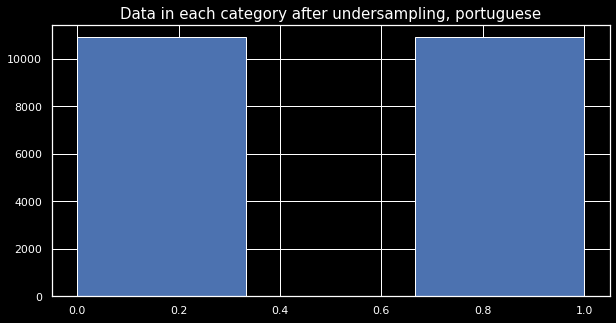

In [193]:
y_pt.hist(bins=3, figsize=(10,5), grid=False)
plt.yticks(c='white')
plt.xticks(c='white')
plt.grid(c='white')
plt.title('Data in each category after undersampling, portuguese', c='white', size=15)
plt.show()

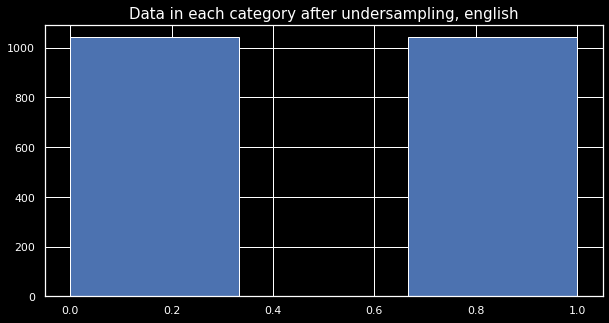

In [194]:
y_en.hist(bins=3, figsize=(10,5), grid=False)
plt.yticks(c='white')
plt.xticks(c='white')
plt.grid(c='white')
plt.title('Data in each category after undersampling, english', c='white', size=15)
plt.show()

The classes have been balanced successfully.

Now, to the model. First, spliting the data in test and validation:

In [23]:
#Portuguese:
X_train_pt, X_valid_pt, y_train_pt, y_valid_pt = train_test_split(
    X_pt,
    y_pt,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y_pt,
    )
'''#English:
X_train_en, X_valid_en, y_train_en, y_valid_en = train_test_split(
    X_en,
    y_en,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y_en,
    )'''

'#English:\nX_train_en, X_valid_en, y_train_en, y_valid_en = train_test_split(\n    X_en,\n    y_en,\n    test_size=0.20,\n    random_state=42,\n    shuffle=True,\n    stratify=y_en,\n    )'

Prepare pipelines

In [29]:
# Create a classifier in pipeline
from imblearn.pipeline import make_pipeline
sentiment_classifier_pt = make_pipeline(CountVectorizer(),RandomUnderSampler(), MultinomialNB())


'''                               #('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('vectorizing', CountVectorizer()),
                                 ('undersampling',RandomUnderSampler()),
                                 ('pre_procesing', TfidfTransformer()),
                                 ('naive_bayes',MultinomialNB())])
'''
# Create a classifier in pipeline
sentiment_classifier_en = Pipeline(steps=[
                               #('pre_processing',TfidfVectorizer(lowercase=False)),
                                 #('pre_procesing',TfidfTransformer()),
                                 ('naive_bayes',MultinomialNB())])

Train each model

In [30]:
# train the sentiment classifier 
sentiment_classifier_pt.fit(X_train_pt,y_train_pt)
#sentiment_classifier_en.fit(X_train_en,y_train_en)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomundersampler', RandomUnderSampler()),
                ('multinomialnb', MultinomialNB())])

Test the model

In [31]:
# test model performance on valid data 
y_preds_pt = sentiment_classifier_pt.predict(X_valid_pt)
#y_preds_en = sentiment_classifier_en.predict(X_valid_en)

In [218]:
print('Accuracy score for model train with portuguese',accuracy_score(y_valid_pt,y_preds_pt))
print('Accuracy score for model train with english',accuracy_score(y_valid_en,y_preds_en))

Accuracy score for model train with portuguese 0.8712121212121212
Accuracy score for model train with english 0.8537170263788969


In [32]:
print('Accuracy score for model train with portuguese',accuracy_score(y_valid_pt,y_preds_pt))

Accuracy score for model train with portuguese 0.8627379209370425


In [33]:
#save model 
import joblib 
joblib.dump(sentiment_classifier_pt, 'sentiment_model_pt_pipeline.pkl')

['sentiment_model_pt_pipeline.pkl']